In [3]:
import tensorflow as tf

In [4]:
model = tf.keras.models.load_model("../beat_pd.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 3, 26)        0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 100, 78)           0         
_________________________________________________________________
batch_normalization_v1_23 (B (None, 100, 78)           312       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 98, 25)            5875      
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 98, 25)            0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 49, 25)            0         
_________________________________________________________________
batch_normalization_v1_24 (B (None, 49, 25)            100       
__________

In [7]:
import pickle as pkl
np_x_data = pkl.load(open("/n/scratch2/ms994/beat_pd_frequency_data.pkl", "rb"))
y = pkl.load(open("/n/scratch2/ms994/beat_pd_labels_1s.pkl", "rb"))

In [20]:
np_x_data.shape, y.shape

((2210912, 3, 26), (2210912, 5))

In [30]:
import numpy as np
allPred = []
labels = []
for i in range(1000):
    start = np.random.randint(2210912)
    pred = model.predict(np.array([np_x_data[start:start+100]]).reshape(1, 100,3,26))
    labels.append(y.iloc[start].on_off)
    allPred.append(pred)

In [32]:
import pandas as pd
snsObj = pd.DataFrame([np.array(allPred).reshape(-1), labels], index=["Pred", "True"]).T

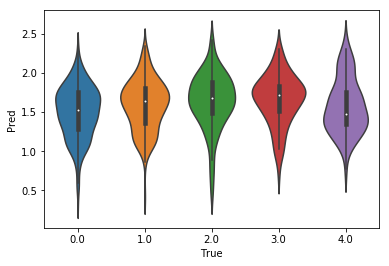

In [33]:
import seaborn as sns

sns.violinplot(x="True", y="Pred", data=snsObj)

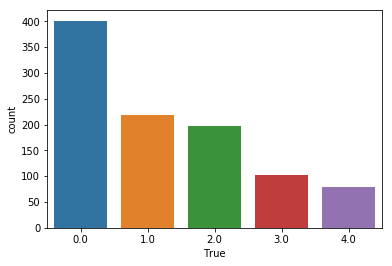

In [34]:
sns.countplot(snsObj["True"])